# Predictive Modelling of Bio-Char Yield%, SSA, HHV

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel('MTP_sample_data 1.xlsx')

In [4]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,BIO-CHAR,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,biomass type,C (%),H (%),N (%),O (%),VM (%),Ash (%),FC (%),T (°C),RT (min),HR (°C/min),N-char (%),Yield-char (%),SSA-char (m2/g),HHV (MJ/KG)
1,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,350,180,1.944444,5.12,NaN,2.567,14.309531
2,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,450,180,2.5,2.01,NaN,45.68,14.309531
3,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,550,180,3.055556,0.55,NaN,221,14.309531
4,marine macroalgae,39.784946,6.353861,5.404273,48.456919,NaN,24.51,NaN,200,120,1.666667,5.235602,78.34,1.909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,60,5,0.28319,36.082474,14.95,18.196395
116,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,15,10,0.536959,38.659794,12.35,18.196395
117,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,30,10,0.355342,37.628866,13.45,18.196395
118,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,300,60,10,0.316491,57.216,7.12,18.196395


In [5]:
a=['biomass type','C (%)','H (%)','N (%)','O (%)','VM (%)','Ash (%)','FC (%)','T (°C)','RT (min)','HR (°C/min)','N-char (%)','Yield-char (%)','SSA-char (m2/g)','HHV (MJ/KG)']

In [6]:
df.columns=a

In [7]:
df=df[1:]

In [8]:
df

,biomass type,C (%),H (%),N (%),O (%),VM (%),Ash (%),FC (%),T (°C),RT (min),HR (°C/min),N-char (%),Yield-char (%),SSA-char (m2/g),HHV (MJ/KG)
1,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,350,180,1.944444,5.12,NaN,2.567,14.309531
2,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,450,180,2.5,2.01,NaN,45.68,14.309531
3,Durian Wood,33.77,11.4,6.06,48.77,85.804416,10.518873,3.676711,550,180,3.055556,0.55,NaN,221,14.309531
4,marine macroalgae,39.784946,6.353861,5.404273,48.456919,NaN,24.51,NaN,200,120,1.666667,5.235602,78.34,1.909,0
5,marine macroalgae,39.784946,6.353861,5.404273,48.456919,NaN,24.51,NaN,400,120,3.333333,4.740771,63.64,70.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,60,5,0.28319,36.082474,14.95,18.196395
116,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,15,10,0.536959,38.659794,12.35,18.196395
117,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,500,30,10,0.355342,37.628866,13.45,18.196395
118,peanut shell,48.867116,6.246173,0.326597,44.090631,77.751706,2.154437,20.093857,300,60,10,0.316491,57.216,7.12,18.196395


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 1 to 119
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   biomass type     119 non-null    object
 1   C (%)            119 non-null    object
 2   H (%)            119 non-null    object
 3   N (%)            119 non-null    object
 4   O (%)            119 non-null    object
 5   VM (%)           86 non-null     object
 6   Ash (%)          113 non-null    object
 7   FC (%)           86 non-null     object
 8   T (°C)           119 non-null    object
 9   RT (min)         119 non-null    object
 10  HR (°C/min)      119 non-null    object
 11  N-char (%)       94 non-null     object
 12  Yield-char (%)   92 non-null     object
 13  SSA-char (m2/g)  102 non-null    object
 14  HHV (MJ/KG)      119 non-null    object
dtypes: object(15)
memory usage: 14.1+ KB


In [10]:
df1=df[['C (%)','H (%)','N (%)','O (%)','VM (%)','Ash (%)','FC (%)','T (°C)','RT (min)','HR (°C/min)','N-char (%)','Yield-char (%)','SSA-char (m2/g)','HHV (MJ/KG)']].astype(float)
df2=pd.DataFrame(df['biomass type'])
df=pd.concat([df2,df1],axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 1 to 119
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   biomass type     119 non-null    object 
 1   C (%)            119 non-null    float64
 2   H (%)            119 non-null    float64
 3   N (%)            119 non-null    float64
 4   O (%)            119 non-null    float64
 5   VM (%)           86 non-null     float64
 6   Ash (%)          113 non-null    float64
 7   FC (%)           86 non-null     float64
 8   T (°C)           119 non-null    float64
 9   RT (min)         119 non-null    float64
 10  HR (°C/min)      119 non-null    float64
 11  N-char (%)       94 non-null     float64
 12  Yield-char (%)   92 non-null     float64
 13  SSA-char (m2/g)  102 non-null    float64
 14  HHV (MJ/KG)      119 non-null    float64
dtypes: float64(14), object(1)
memory usage: 14.1+ KB


In [12]:
df.describe()

,C (%),H (%),N (%),O (%),VM (%),Ash (%),FC (%),T (°C),RT (min),HR (°C/min),N-char (%),Yield-char (%),SSA-char (m2/g),HHV (MJ/KG)
count,119.000000,119.000000,119.000000,119.000000,86.000000,113.000000,86.000000,119.000000,119.000000,119.000000,94.000000,92.000000,102.000000,119.000000
mean,47.584303,6.735472,2.550053,42.795072,73.349360,12.608699,15.354668,494.957983,86.092437,9.828992,3.165421,39.631564,63.615954,11.593702
std,4.718941,1.721371,2.217384,5.237327,9.649110,10.990883,6.962399,144.591030,74.441877,7.455507,2.464779,13.343853,95.630182,7.493723
min,33.770000,3.419763,0.050005,28.106974,49.357766,0.438596,3.366013,200.000000,10.000000,1.000000,0.150060,18.800000,0.394800,0.000000
25%,45.414365,5.980000,0.855943,40.263797,67.780000,3.760000,8.800000,400.000000,60.000000,6.250000,0.907508,29.415000,4.417500,0.000000
50%,47.600000,6.329273,1.622249,43.867403,76.122673,10.020831,16.610000,500.000000,60.000000,10.000000,2.890307,37.599433,13.961200,14.515176
75%,48.873782,7.107157,4.484305,46.324898,78.964401,20.300000,20.261830,600.000000,120.000000,10.833333,4.788796,46.320000,69.817500,17.489212
max,61.570000,13.672922,8.210000,52.860000,94.161220,42.020000,32.025316,800.000000,480.000000,60.000000,9.195402,88.500000,381.500000,19.526000


In [13]:
df.isnull().sum()

biomass type        0
C (%)               0
H (%)               0
N (%)               0
O (%)               0
VM (%)             33
Ash (%)             6
FC (%)             33
T (°C)              0
RT (min)            0
HR (°C/min)         0
N-char (%)         25
Yield-char (%)     27
SSA-char (m2/g)    17
HHV (MJ/KG)         0
dtype: int64

In [14]:
columns_with_missing_values=df.columns[df.isnull().any()]
df[columns_with_missing_values].isnull().sum()

VM (%)             33
Ash (%)             6
FC (%)             33
N-char (%)         25
Yield-char (%)     27
SSA-char (m2/g)    17
dtype: int64

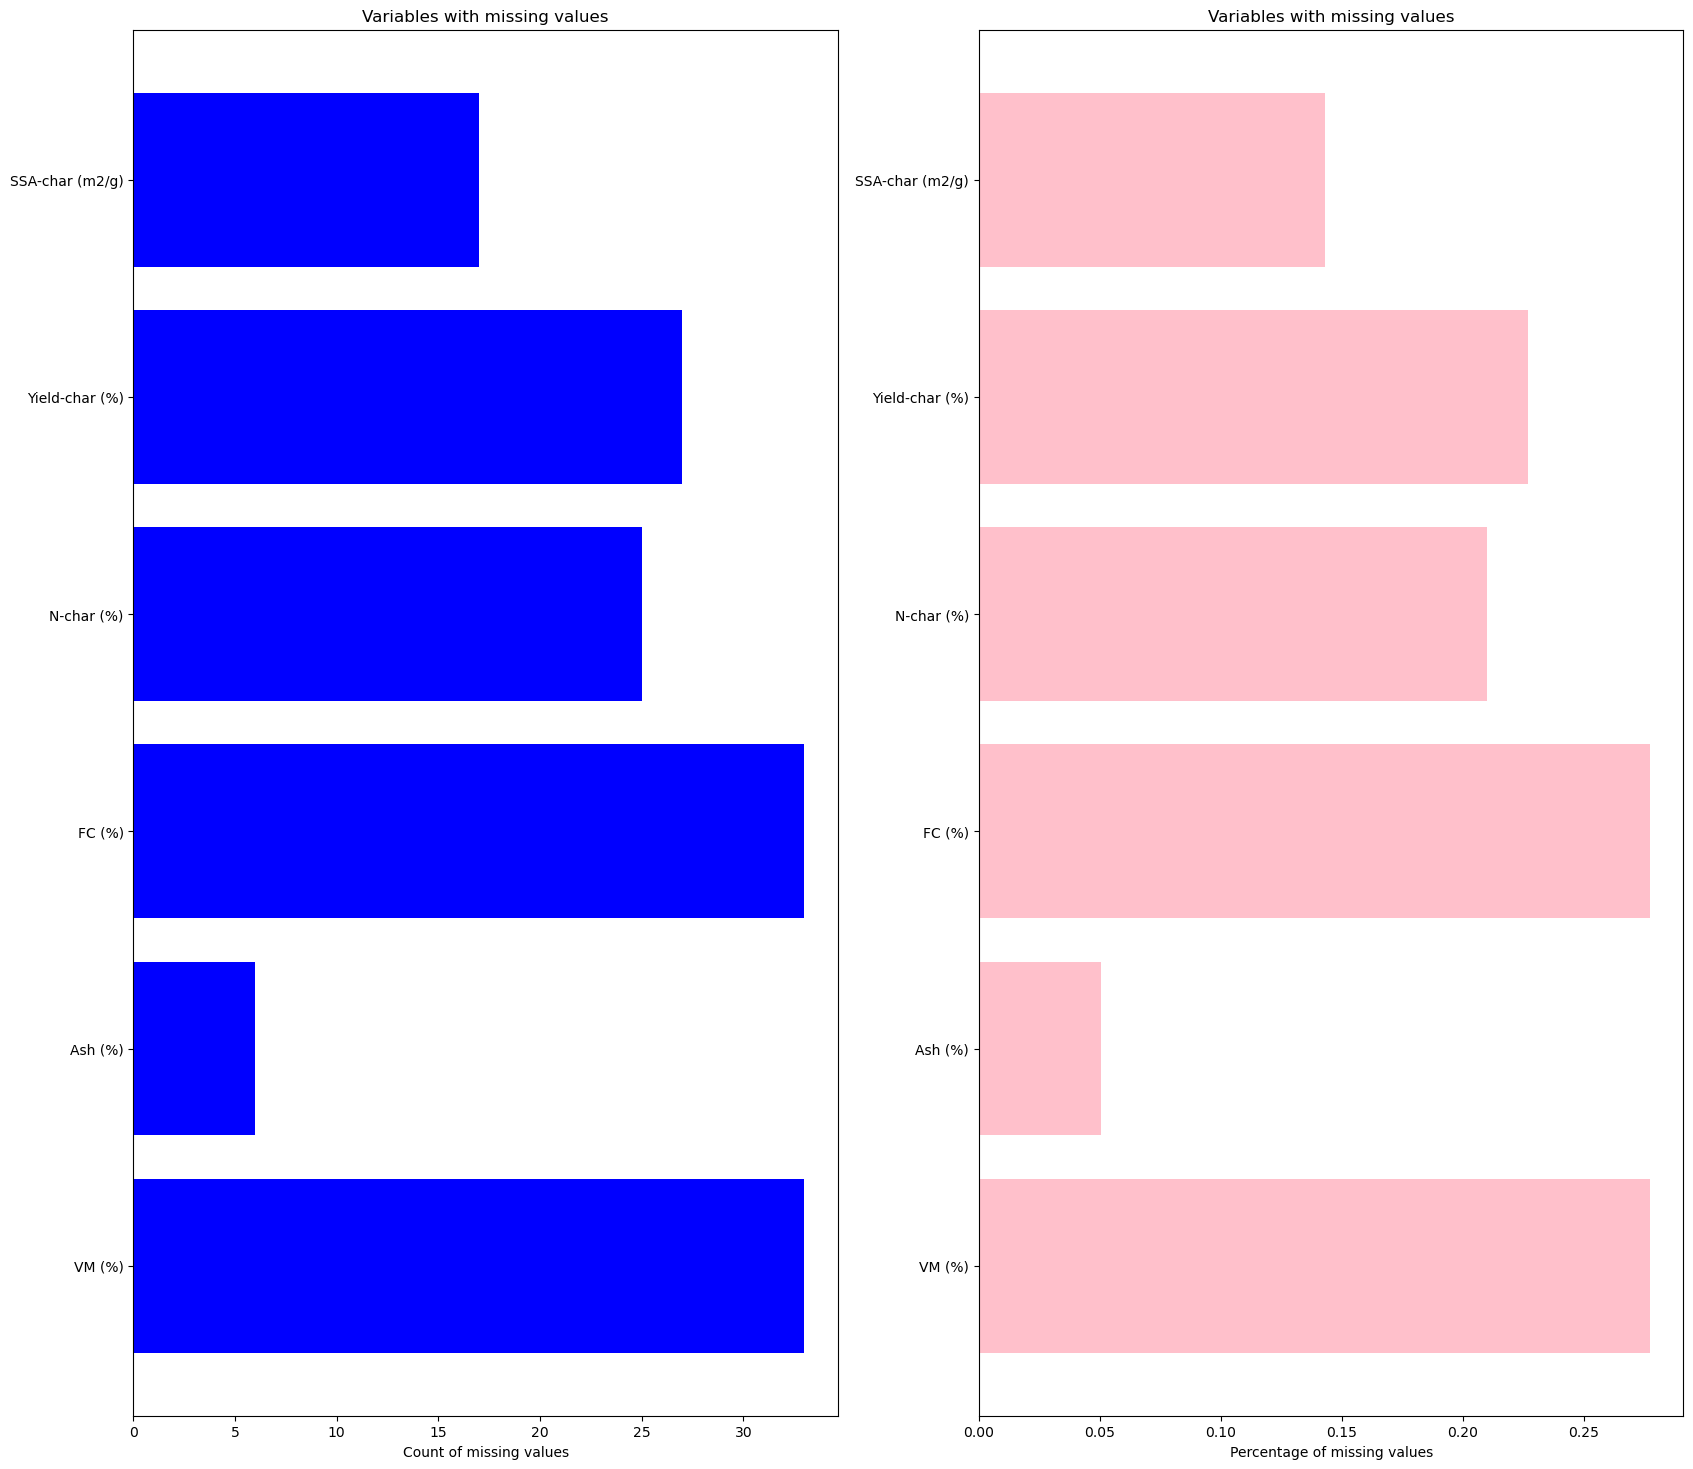

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
# To hold variable names
labels = [] 

# To hold the count of missing values for each variable 
valuecount = [] 

# To hold the percentage of missing values for each variable
percentcount = [] 

for col in columns_with_missing_values:
    labels.append(col)
    valuecount.append(df[col].isnull().sum())
    percentcount.append(df[col].isnull().sum()/df.shape[0])
    
ind = np.arange(len(labels))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,18))

rects = ax1.barh(ind, np.array(valuecount), color='blue')
ax1.set_yticks(ind)
ax1.set_yticklabels(labels, rotation='horizontal')
ax1.set_xlabel("Count of missing values")
ax1.set_title("Variables with missing values");

rects = ax2.barh(ind, np.array(percentcount), color='pink')
ax2.set_yticks(ind)
ax2.set_yticklabels(labels, rotation='horizontal')
ax2.set_xlabel("Percentage of missing values")
ax2.set_title("Variables with missing values");

We can also visualize the missing values using charts

<Axes: >

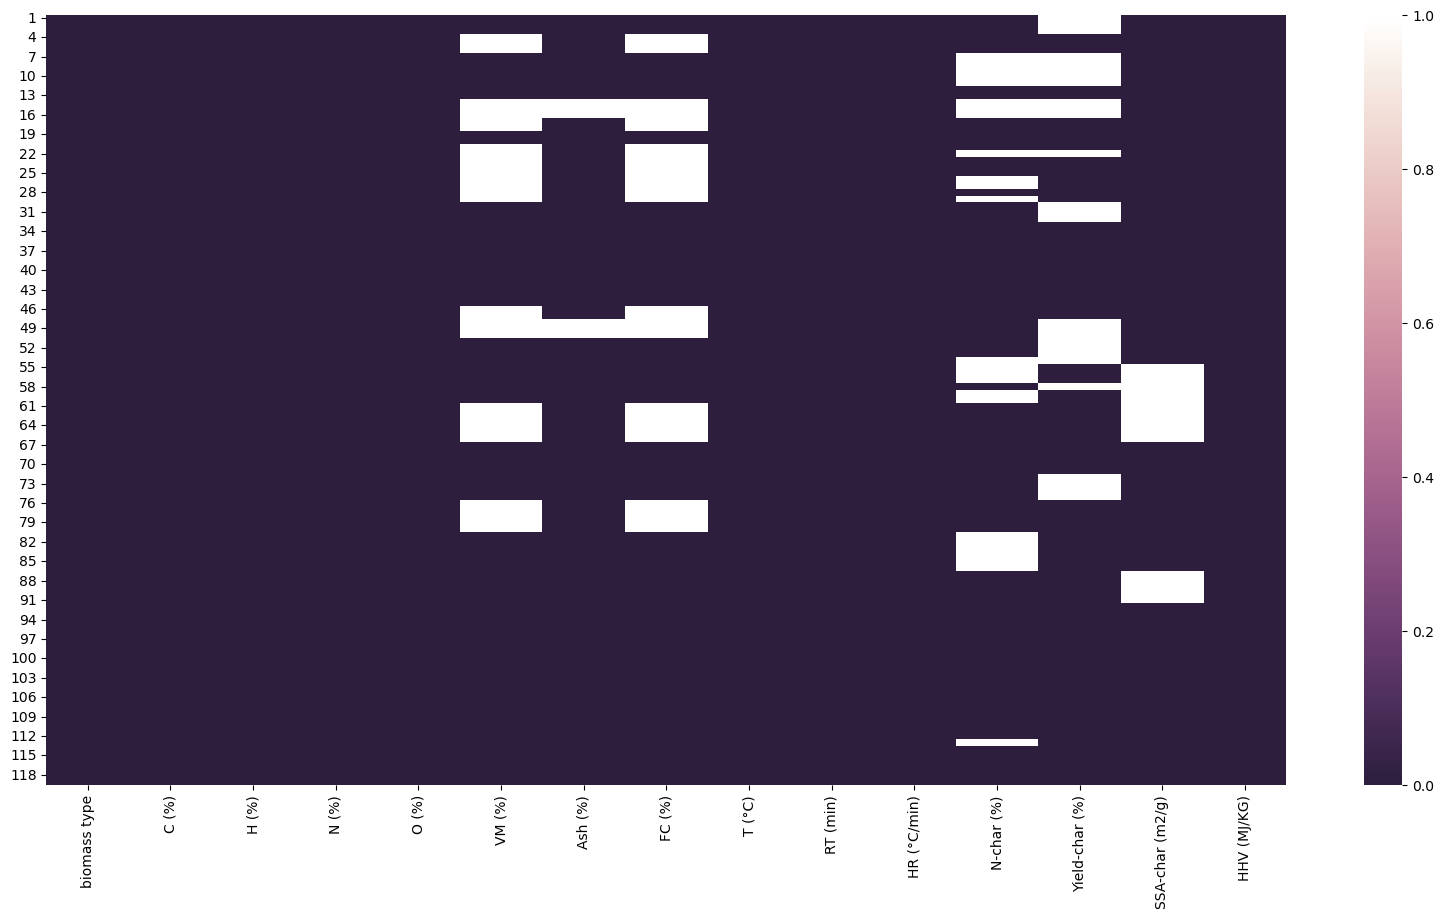

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)

In [18]:
# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)

Number of Numerical features:  14
Index(['C (%)', 'H (%)', 'N (%)', 'O (%)', 'VM (%)', 'Ash (%)', 'FC (%)',
       'T (°C)', 'RT (min)', 'HR (°C/min)', 'N-char (%)', 'Yield-char (%)',
       'SSA-char (m2/g)', 'HHV (MJ/KG)'],
      dtype='object')


<Axes: >

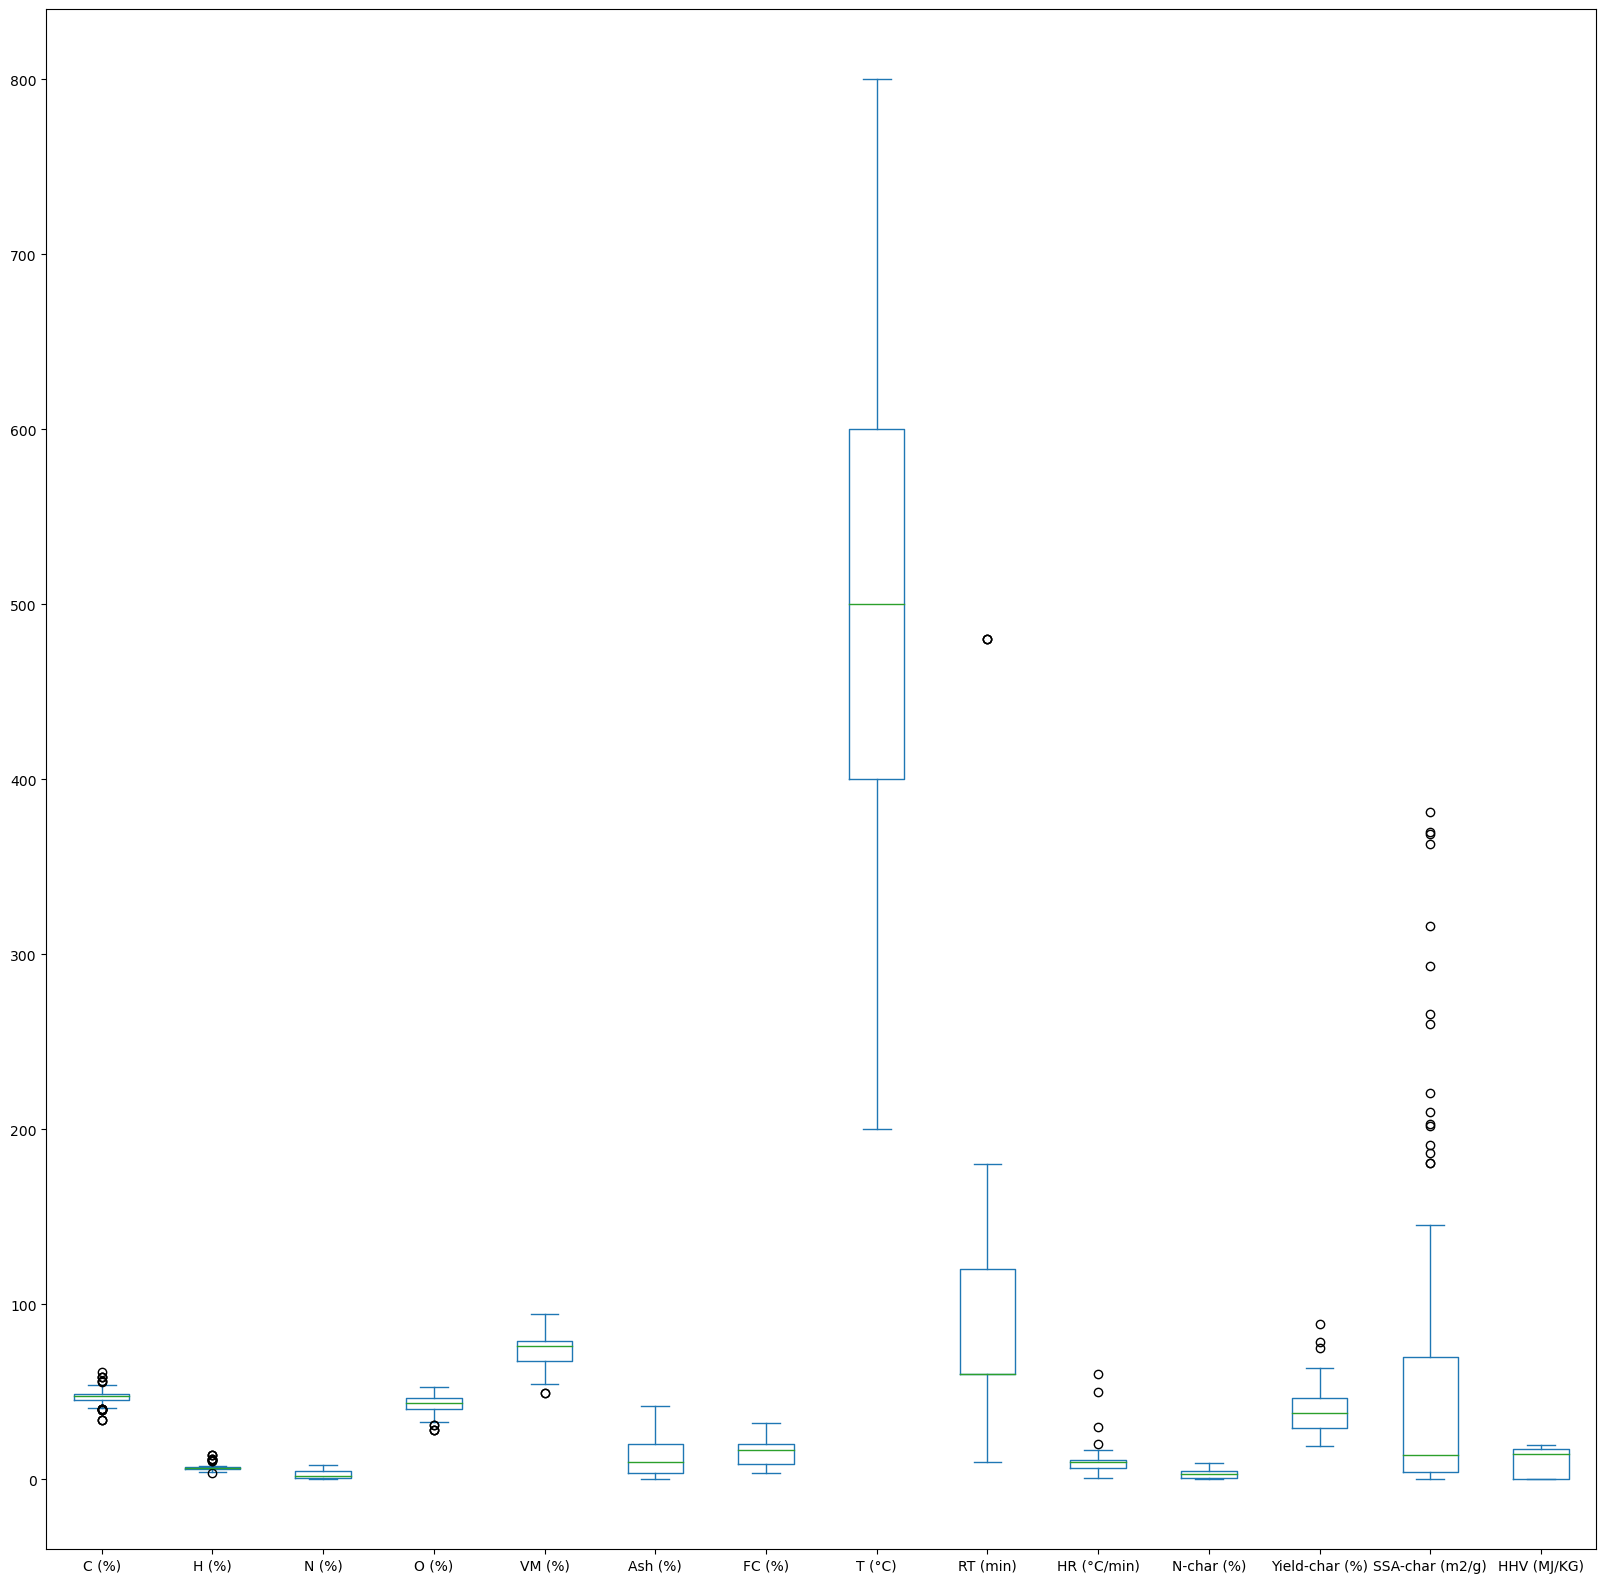

In [19]:
df.plot.box(figsize=(20,20))

##### From the above boxlot we can see that outliers are present in 'C (%)', 'H (%)', 'O (%)' and 'HR (°C/min)'

<Axes: ylabel='C (%)'>

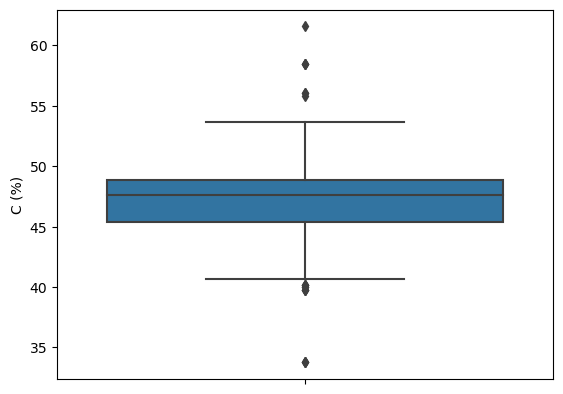

In [20]:
#df['C (%)'].plot.box()
sns.boxplot(y='C (%)', data=df)

<Axes: ylabel='H (%)'>

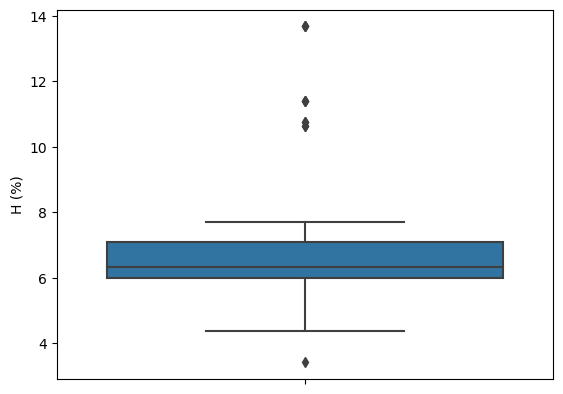

In [21]:
#df['C (%)'].plot.box()
sns.boxplot(y='H (%)', data=df)

<Axes: ylabel='O (%)'>

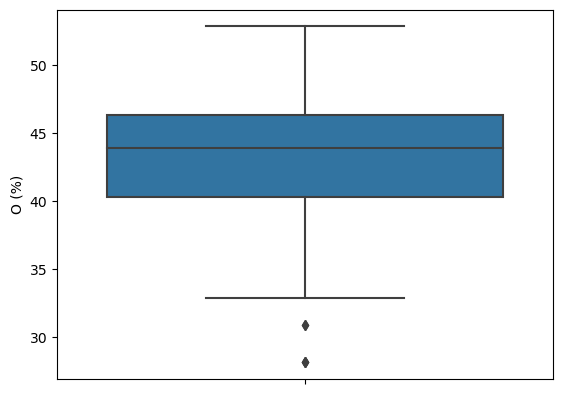

In [22]:
#df['C (%)'].plot.box()
sns.boxplot(y='O (%)', data=df)

<Axes: ylabel='HR (°C/min)'>

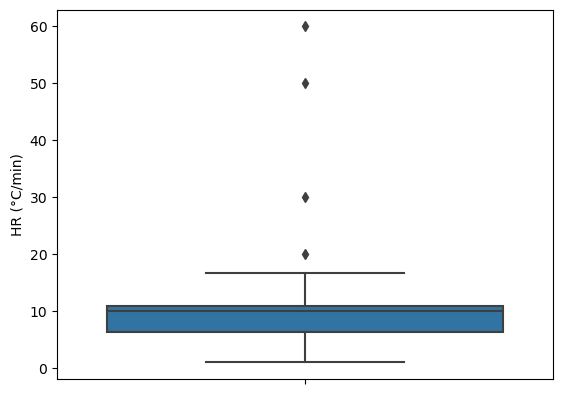

In [23]:
#df['C (%)'].plot.box()
sns.boxplot(y='HR (°C/min)', data=df)

In [29]:
import warnings
warnings.filterwarnings("ignore")

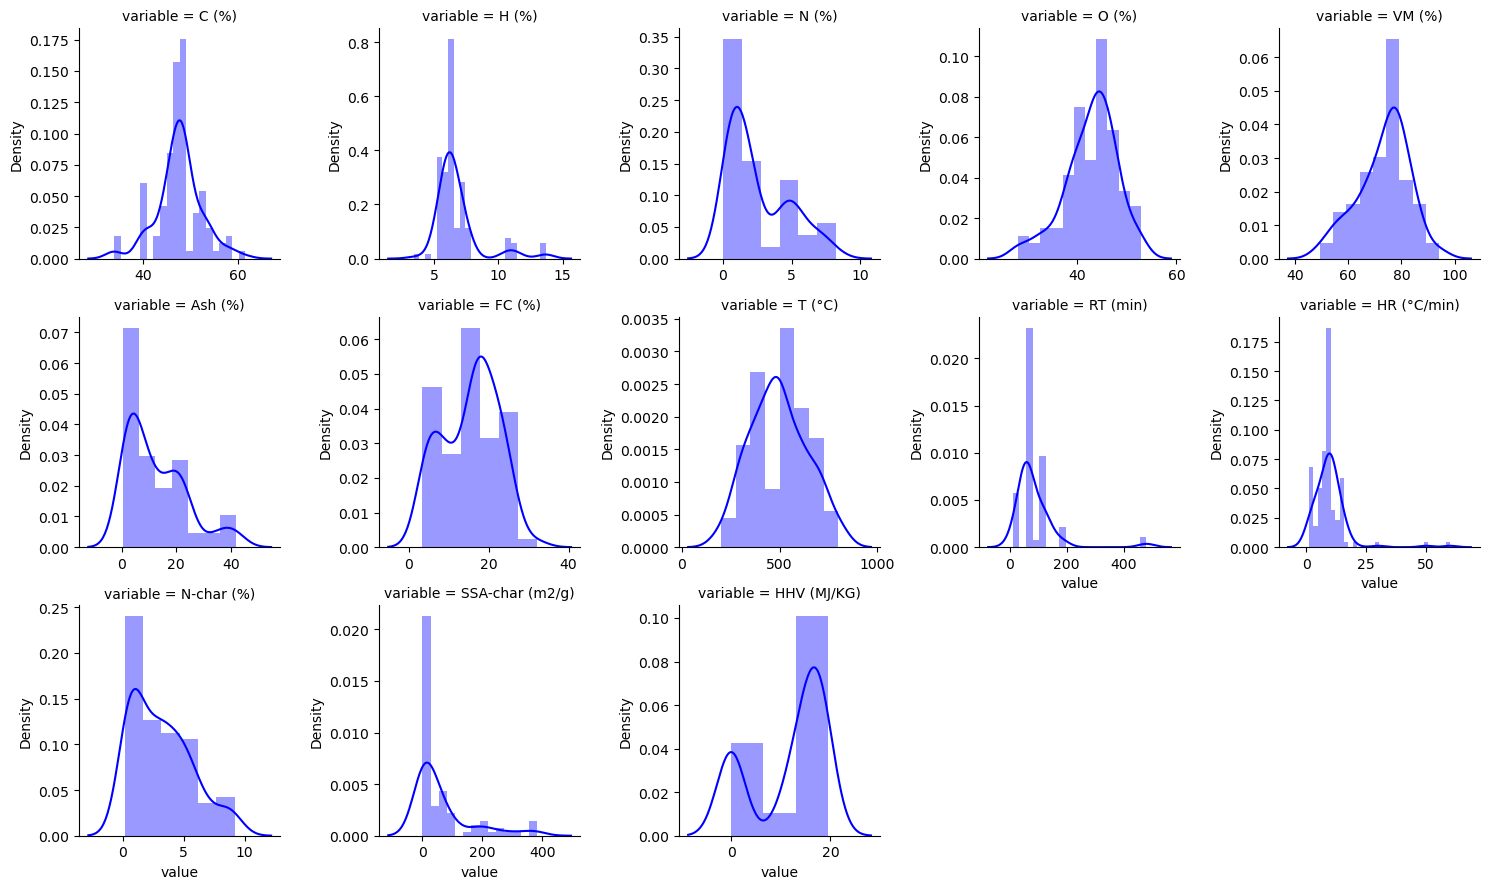

In [30]:
f = pd.melt(df, id_vars=['Yield-char (%)'],value_vars= numerical_features[numerical_features != 'Yield-char (%)'])
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="blue") 

array([[<Axes: title={'center': 'C (%)'}>,
        <Axes: title={'center': 'H (%)'}>,
        <Axes: title={'center': 'N (%)'}>,
        <Axes: title={'center': 'O (%)'}>],
       [<Axes: title={'center': 'VM (%)'}>,
        <Axes: title={'center': 'Ash (%)'}>,
        <Axes: title={'center': 'FC (%)'}>,
        <Axes: title={'center': 'T (°C)'}>],
       [<Axes: title={'center': 'RT (min)'}>,
        <Axes: title={'center': 'HR (°C/min)'}>,
        <Axes: title={'center': 'N-char (%)'}>,
        <Axes: title={'center': 'Yield-char (%)'}>],
       [<Axes: title={'center': 'SSA-char (m2/g)'}>,
        <Axes: title={'center': 'HHV (MJ/KG)'}>, <Axes: >, <Axes: >]],
      dtype=object)

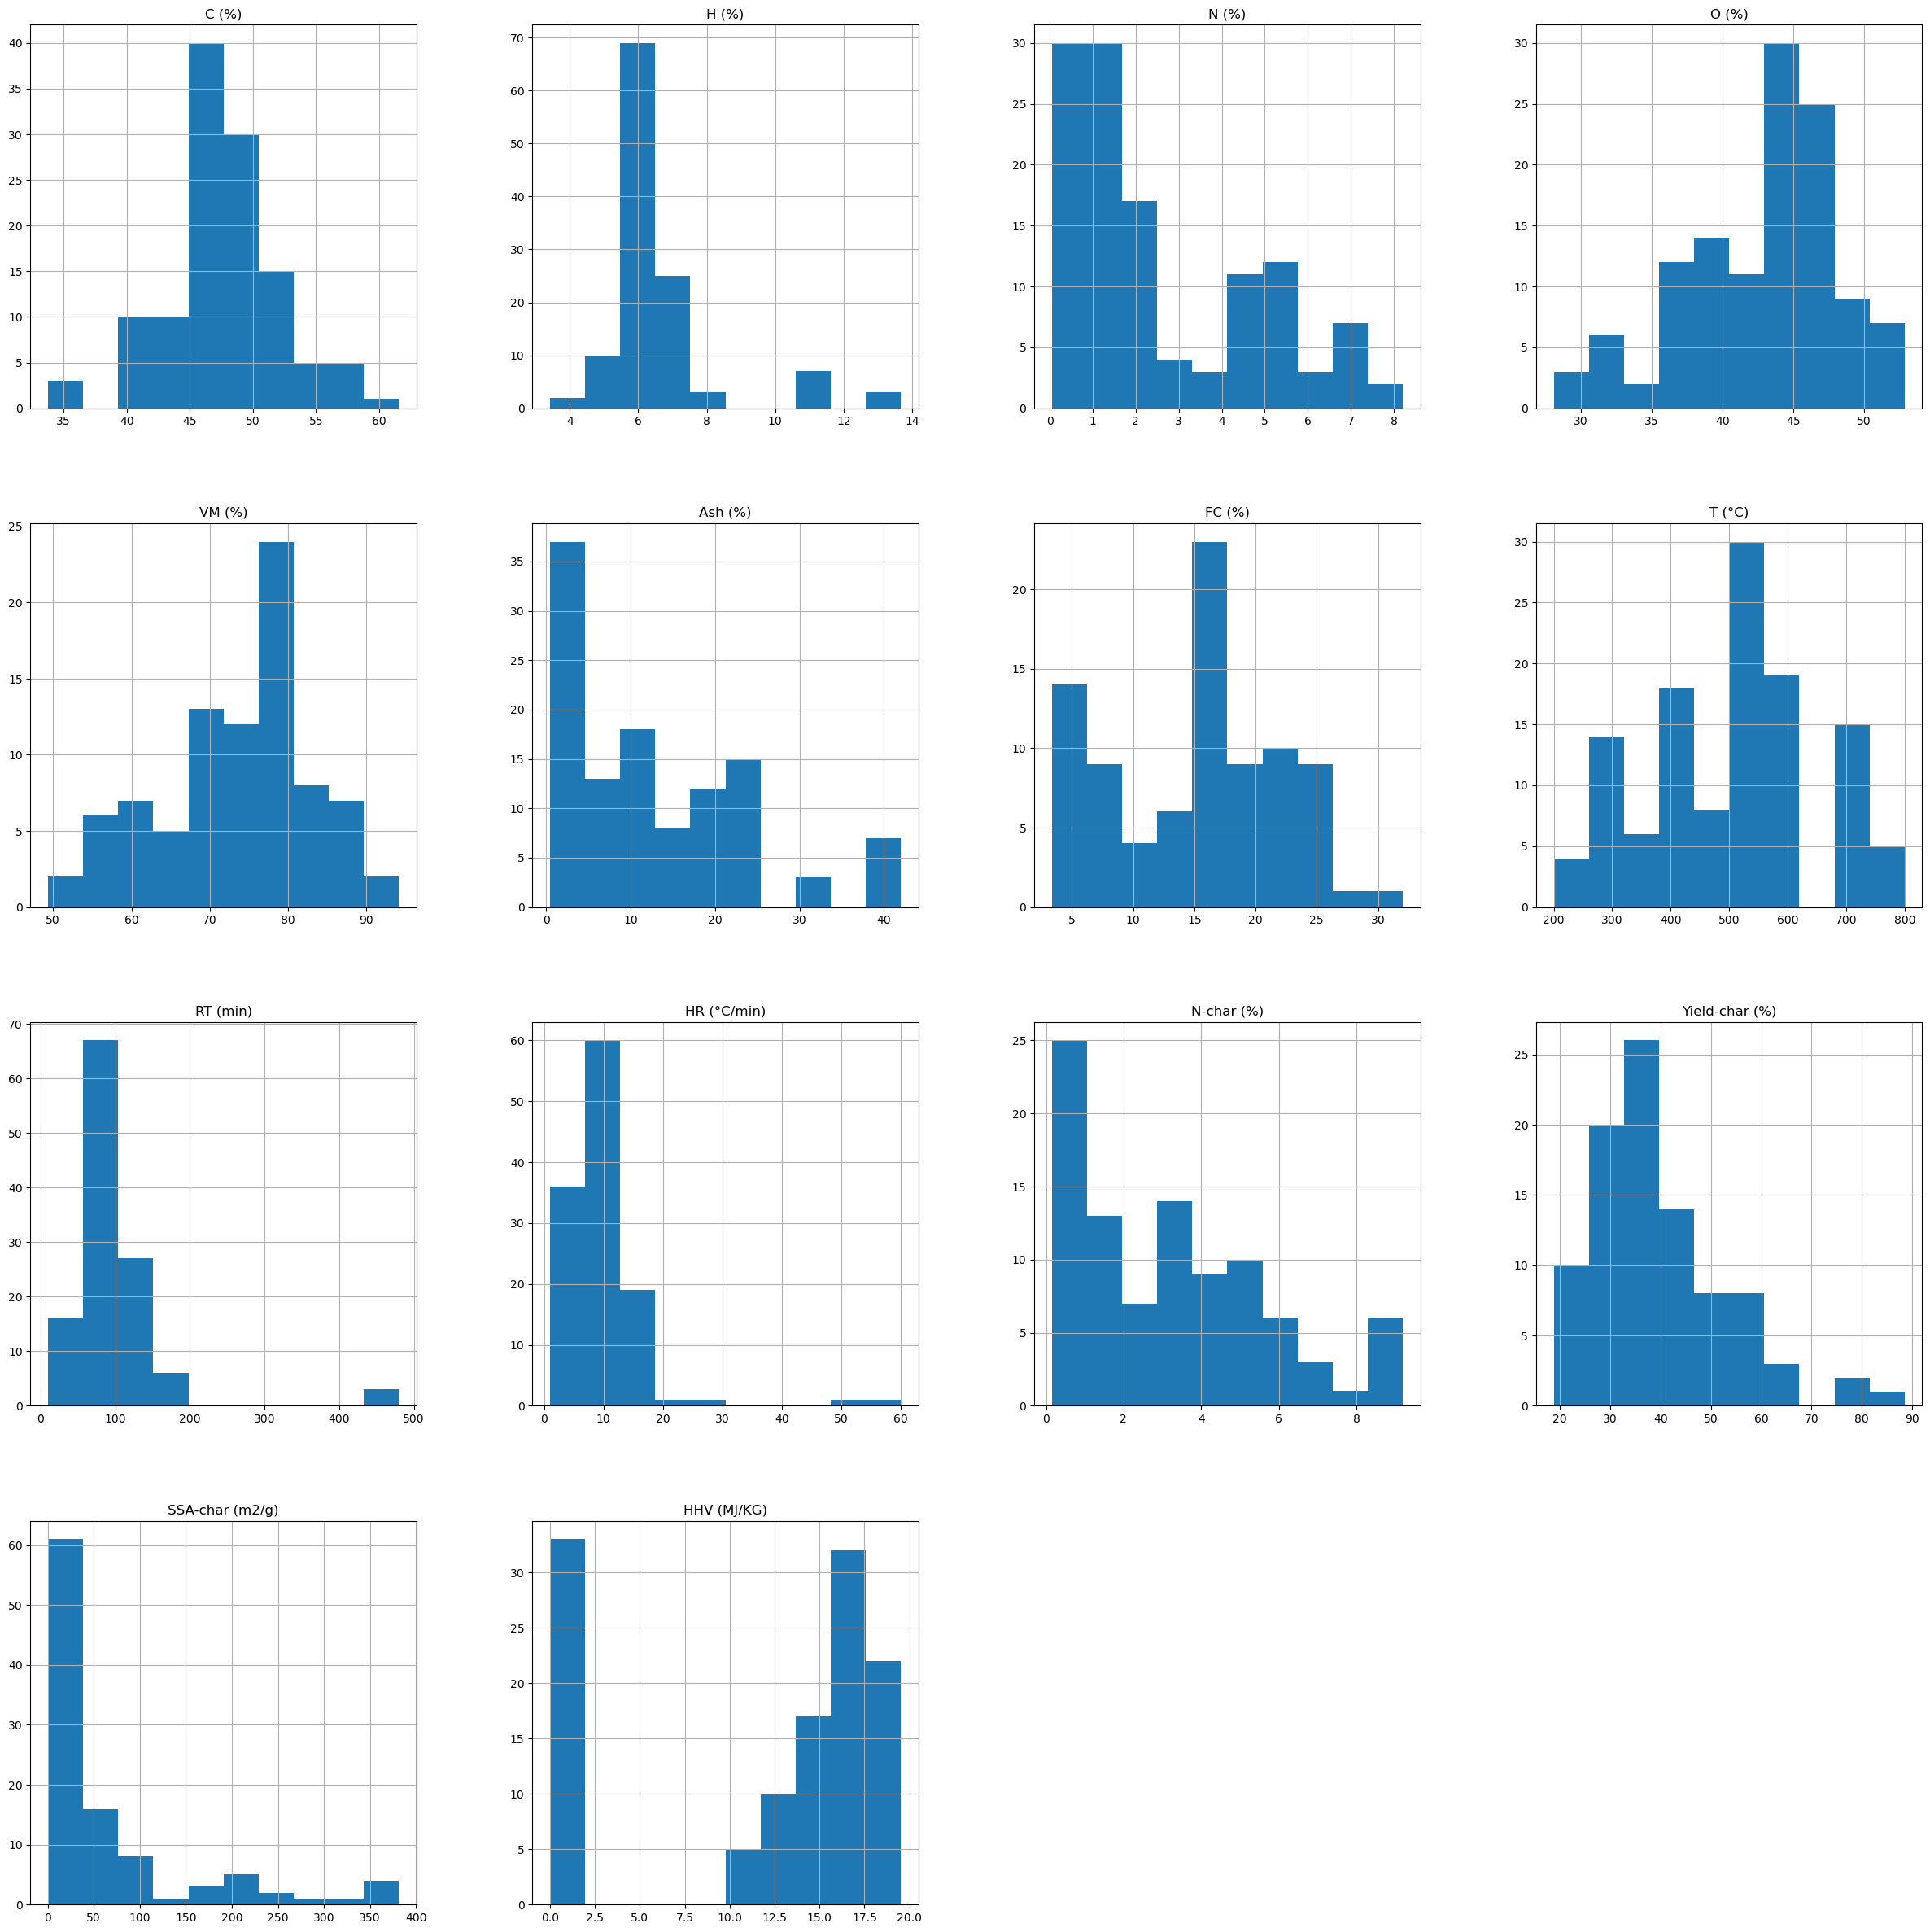

In [64]:
df.hist(figsize=(30,30))

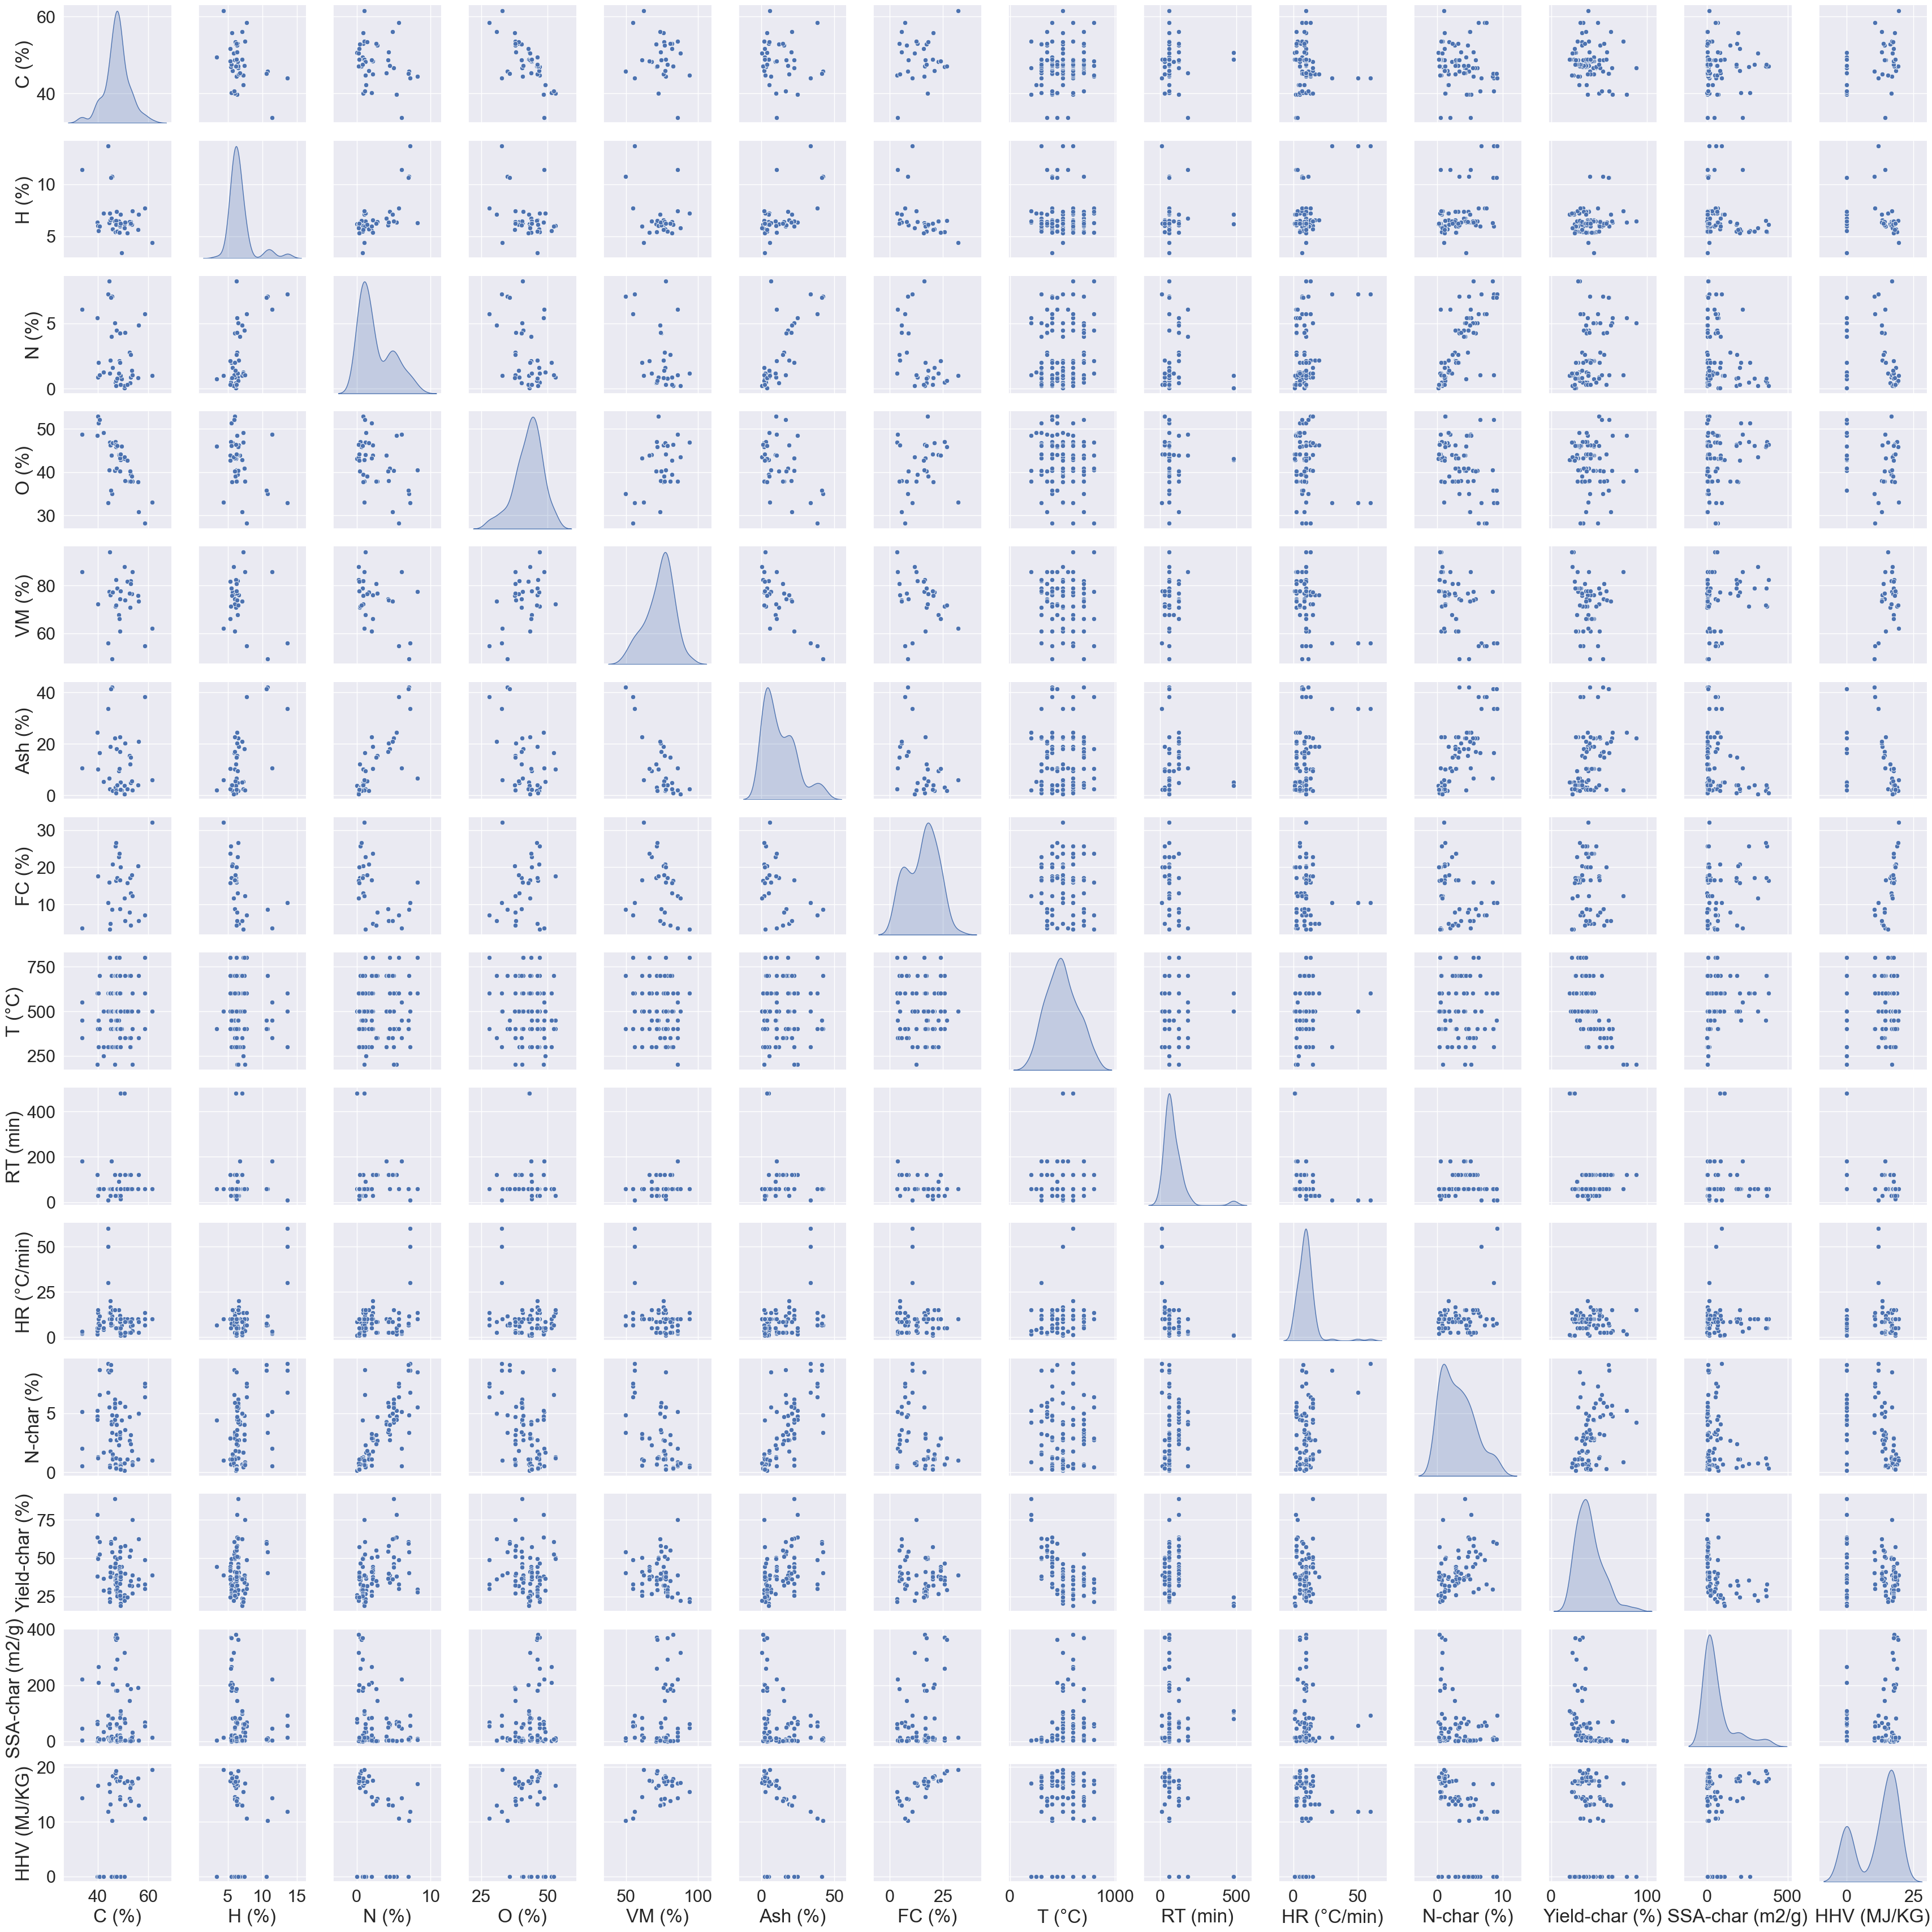

In [83]:
sns.pairplot(df,diag_kind='kde')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3876\689261746.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Yield-char (%)'], df['HR (°C/min)'], cmap='viridis')


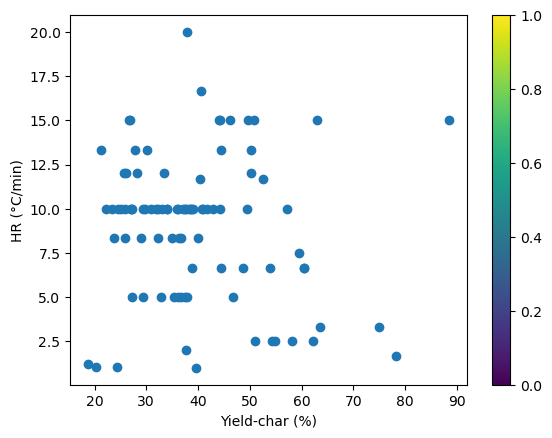

In [28]:
plt.scatter(df['Yield-char (%)'], df['HR (°C/min)'], cmap='viridis')
plt.xlabel('Yield-char (%)')
plt.ylabel('HR (°C/min)')
plt.colorbar()
plt.show()

In [67]:
corr=df.corr()['Yield-char (%)']
corr[np.argsort(corr)[::-1]]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8880\3106411119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()['Yield-char (%)']


Yield-char (%)     1.000000
N-char (%)         0.429101
Ash (%)            0.399212
N (%)              0.366442
H (%)              0.162776
O (%)             -0.089038
VM (%)            -0.105552
RT (min)          -0.107707
HR (°C/min)       -0.111273
FC (%)            -0.173572
C (%)             -0.178042
HHV (MJ/KG)       -0.256238
SSA-char (m2/g)   -0.441938
T (°C)            -0.609253
Name: Yield-char (%), dtype: float64

In [68]:
corr=df.corr()['HHV (MJ/KG)']
corr[np.argsort(corr)[::-1]]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8880\249782991.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()['HHV (MJ/KG)']


HHV (MJ/KG)        1.000000
FC (%)             0.794561
VM (%)             0.453827
C (%)              0.306043
SSA-char (m2/g)    0.141767
T (°C)             0.047975
HR (°C/min)        0.040470
O (%)             -0.027636
H (%)             -0.169389
Yield-char (%)    -0.256238
RT (min)          -0.334442
N (%)             -0.387270
Ash (%)           -0.433323
N-char (%)        -0.512055
Name: HHV (MJ/KG), dtype: float64

In [69]:
corr=df.corr()['SSA-char (m2/g)']
corr[np.argsort(corr)[::-1]]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8880\1318738430.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()['SSA-char (m2/g)']


SSA-char (m2/g)    1.000000
T (°C)             0.360881
FC (%)             0.192900
O (%)              0.178215
HHV (MJ/KG)        0.141767
VM (%)             0.138324
RT (min)           0.024801
HR (°C/min)        0.004499
C (%)             -0.039797
H (%)             -0.129930
N (%)             -0.211100
Ash (%)           -0.247830
N-char (%)        -0.284171
Yield-char (%)    -0.441938
Name: SSA-char (m2/g), dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8880\3403391320.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

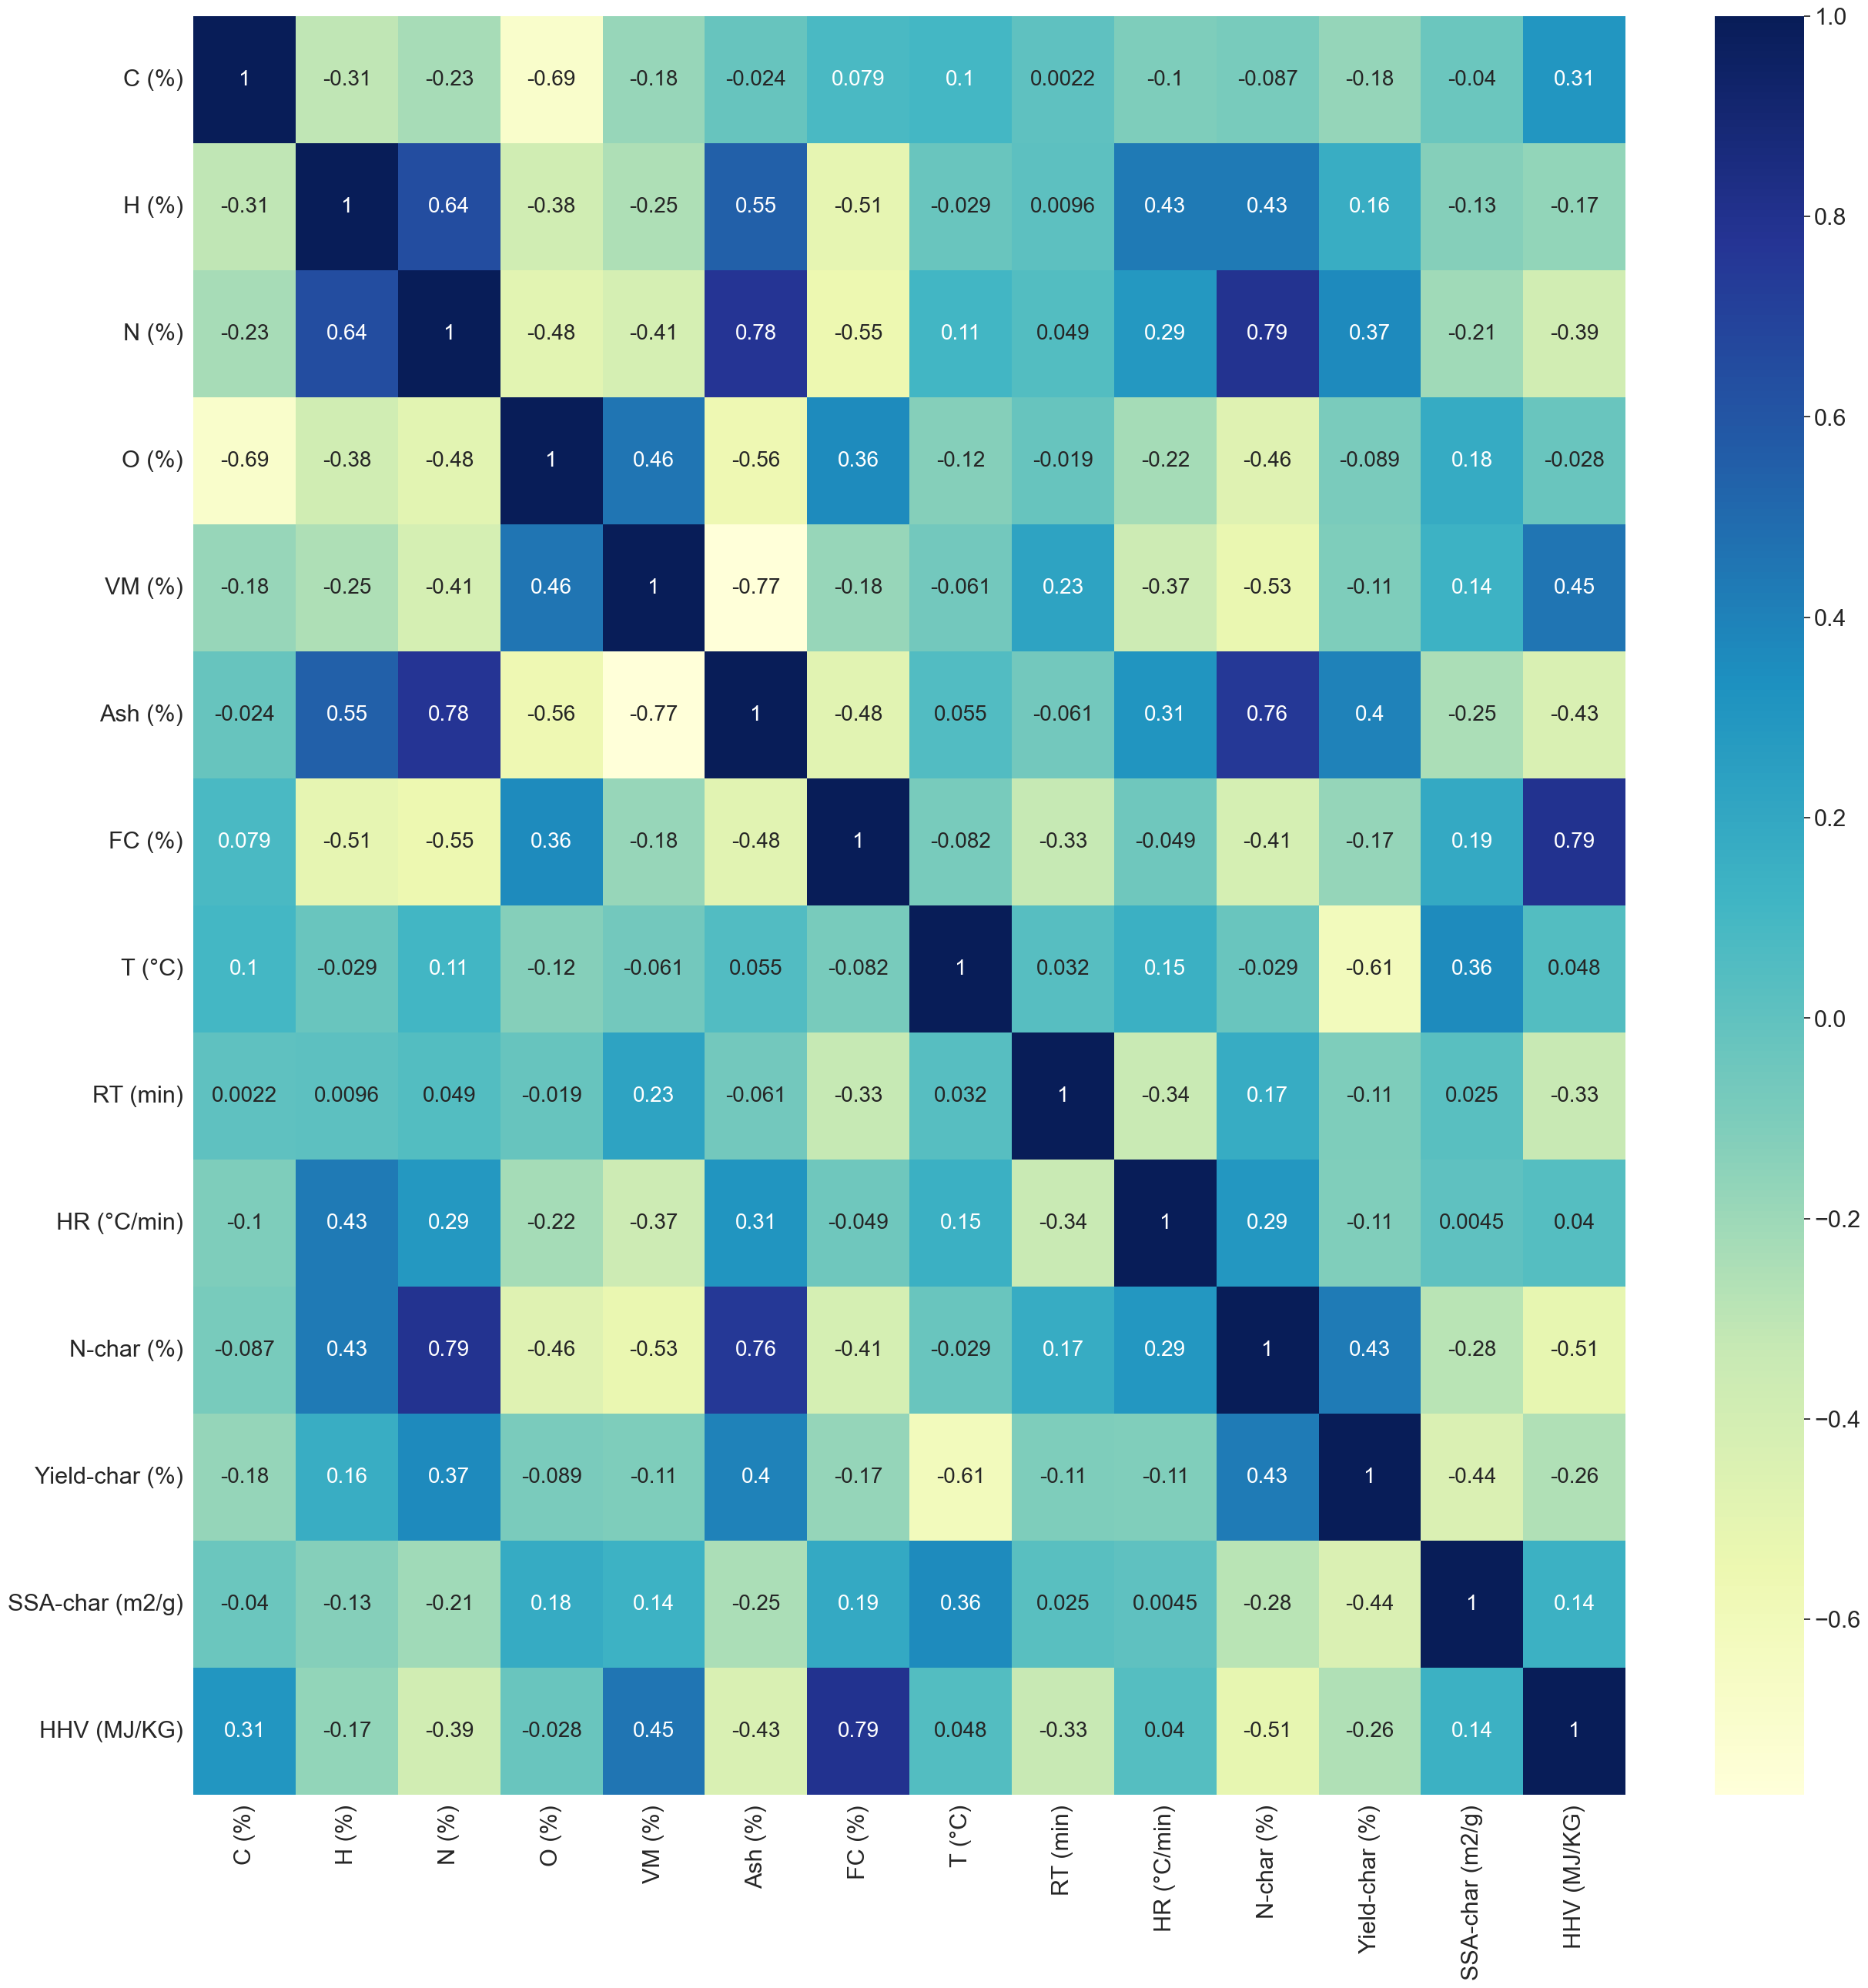

In [75]:
sns.set(font_scale=2.0)
f, ax = plt.subplots(figsize = (30, 30))
corr=df.corr()
corr
sns.heatmap(corr, annot=True,cmap="YlGnBu",annot_kws={'size': 20})

In [35]:
import collections
def numSubarraysWithSum(nums, goal):
    res=collections.defaultdict(int)
    res[0]=1
    ans=0
    prefixsum=0
    for i in nums:
        prefixsum+=i
        ans+=res[prefixsum-goal]
        res[prefixsum]+=1
    return ans

In [36]:
numSubarraysWithSum([1,2,3,1,7], 6)

2